<a href="https://colab.research.google.com/github/ZahraMoeini/Regression/blob/main/knn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

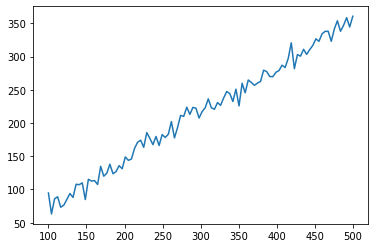

In [22]:
var =10
x = np.linspace(100,500,100)
y = 0.7*x + 0.5* np.log(x) + np.random.randn(len(x))*var
plt.plot(x,y)

In [23]:
def knn(X,Y,k,key):
  neighbors_x=X[:k]
  neighbors_y=Y[:k]
  dis=np.abs(neighbors_x-key)
  sorted_index = dis.argsort()
  dis = dis[sorted_index]
  neighbors_x=neighbors_x[sorted_index]
  neighbors_y=neighbors_y[sorted_index]
  
  for i in range(k,len(X)):
    dis2key= np.abs(X[i]-key)
    if  dis2key < dis[k-1]:
      for j in range(k):
        curr = k-(j+1)
        pere = curr -1
        if dis2key > dis[pere]:
          dis[curr] = dis2key
          neighbors_x[curr]=X[i]
          neighbors_y[curr]=Y[i]
          break
        else:
          dis[curr]=dis[pere]
          neighbors_x[curr]=neighbors_x[pere]
          neighbors_y[curr]=neighbors_y[pere]

          if pere == 0:
            dis[pere]=dis2key
            neighbors_x[pere]=X[i]
            neighbors_y[pere]=Y[i]
            break
  return neighbors_x,neighbors_y,dis

In [24]:
k=10
key = 200
neighbors_x,neighbors_y,dis = knn(x,y,k,key)

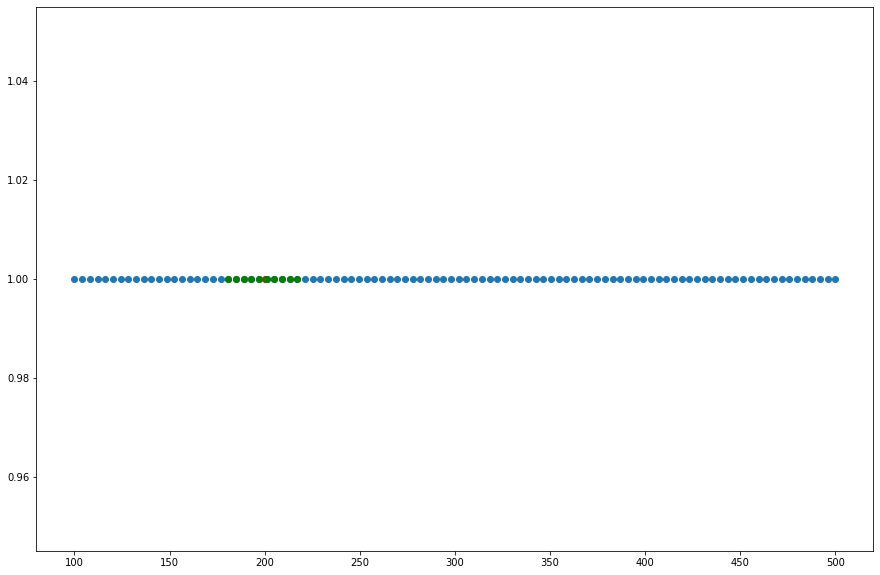

In [25]:
fig = plt.figure(figsize=(15,10))
plt.scatter(x,np.ones(len(x)))
plt.plot(key,1,'or')
plt.plot(neighbors_x,np.ones(k),'og')

plt.show()

In [30]:
pred = []
k=2
for val in x:
  neighbors_x,neighbors_y,dis =knn(x,y,k,val)
  pred.append(np.sum(neighbors_y)/k)

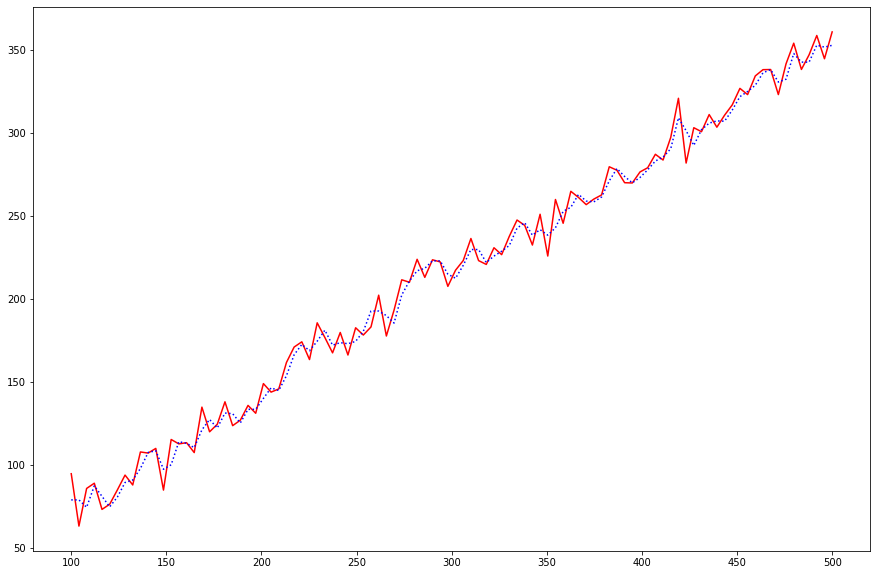

In [31]:
fig = plt.figure(figsize=(15,10))
plt.plot(x,y,'r',x,pred,':b')